BUSINESS CHALLENGE/REQUIREMENT
Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.
Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article.
Over period of few years Mashable has collected data on around 40,000 articles.
You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from math import sqrt
import statistics as st
import time

# Load Data

In [2]:
df=pd.read_csv('c:/edureka/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Prepare Data

URL and timedelta columns need to drop from DataFrame since they are meta-data and cannot be treated as features.


In [3]:
new_df=df.drop(['url','timedelta'], axis=1)

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               39644 non-null float64
data_channel_is_socmed            39644 non-null float64
data_channel_is_tech              39

In [5]:
new_df.isnull().sum()

n_tokens_title                    0
n_tokens_content                  0
n_unique_tokens                   0
n_non_stop_words                  0
n_non_stop_unique_tokens          0
num_hrefs                         0
num_self_hrefs                    0
num_imgs                          0
num_videos                        0
average_token_length              0
num_keywords                      0
data_channel_is_lifestyle         0
 data_channel_is_entertainment    0
data_channel_is_bus               0
data_channel_is_socmed            0
data_channel_is_tech              0
data_channel_is_world             0
kw_min_min                        0
kw_max_min                        0
kw_avg_min                        0
kw_min_max                        0
kw_max_max                        0
kw_avg_max                        0
kw_min_avg                        0
kw_max_avg                        0
kw_avg_avg                        0
self_reference_min_shares         0
self_reference_max_shares   

# Visualize Data

In [6]:
columns_day = new_df.columns.values[29:36]
unpop=new_df[new_df['shares']<1400]
pop=new_df[new_df['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

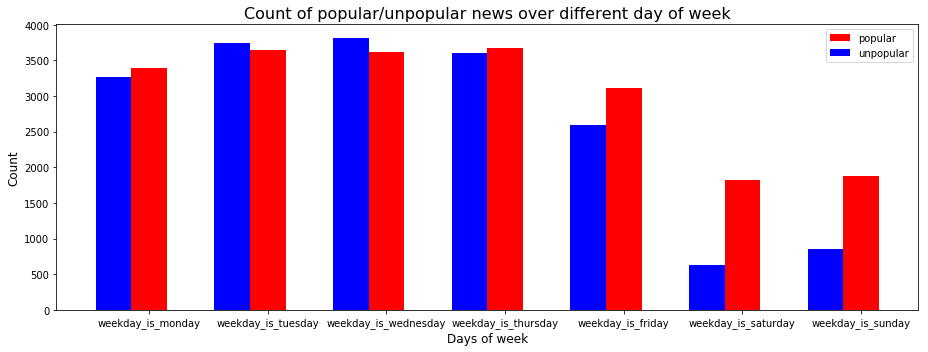

In [7]:
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week", fontsize = 16)
plt.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_day)), columns_day)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()

plt.show()

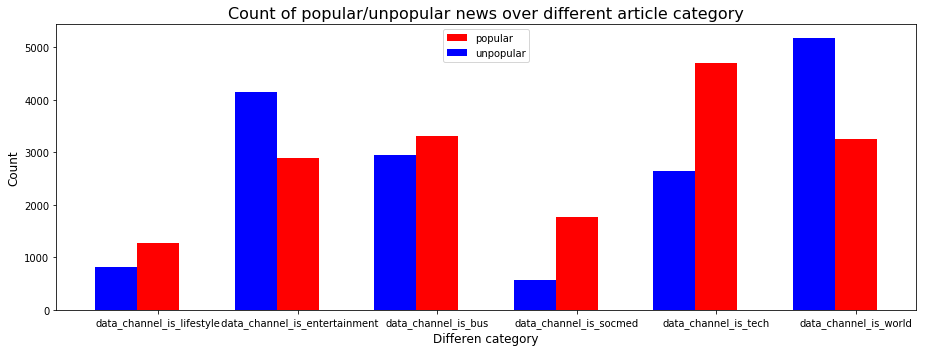

In [8]:
columns_chan=new_df.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different article category", fontsize = 16)
plt.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(columns_chan)), columns_chan)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("Differen category", fontsize = 12)
    
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

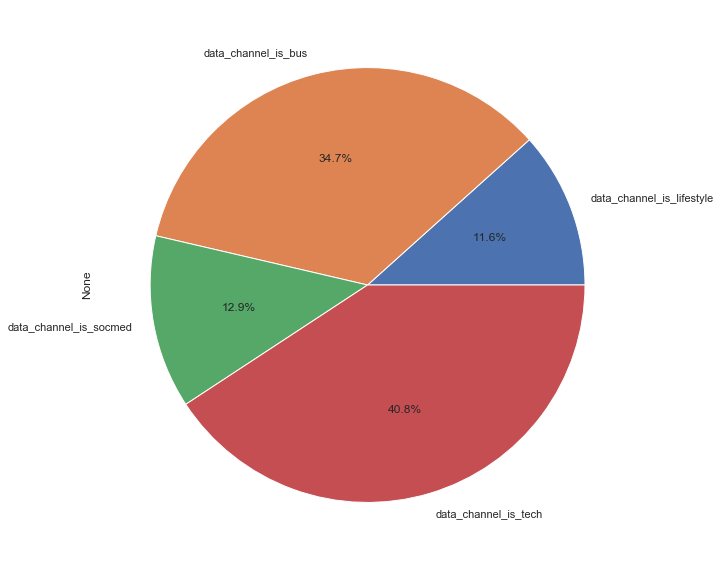

In [10]:
activities = ['data_channel_is_lifestyle', 'data_channel_is_bus', 'data_channel_is_socmed',
               'data_channel_is_tech']

new_df[activities].sum().plot(kind='pie', autopct='%1.1f%%')
sns.set(rc={'figure.figsize':(16, 10)});


In [11]:
new_df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_nega

In [12]:
new_df.shape

(39644, 59)

In [13]:
col_numerical = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

# Scale Data

In [14]:
scaler = MinMaxScaler()
new_df[col_numerical] = scaler.fit_transform(df[col_numerical])

# Creating a new data set without outliers

In [15]:
new_df = new_df[new_df['shares']<26647]

In [16]:
new_df.shape

(39130, 59)

In [17]:
new_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,593
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,711
2,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,1500
3,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,1200
4,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,505


# Correlations in data - numerically and graphically

In [18]:
corr_matrix = new_df.corr().abs()
corr_matrix

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018893,0.005323,0.004734,0.005432,0.052038,0.013883,0.007958,0.050440,0.070241,...,0.024406,0.020751,0.017060,0.029760,0.012145,0.078063,0.001213,1.473208e-01,0.041271,0.015063
n_tokens_content,0.018893,1.000000,0.004532,0.017533,0.000523,0.424115,0.304944,0.347356,0.104514,0.167746,...,0.261566,0.416569,0.131847,0.452195,0.225698,0.005333,0.024254,7.486100e-03,0.014182,0.006910
n_unique_tokens,0.005323,0.004532,1.000000,0.999579,0.999854,0.004299,0.006665,0.019192,0.000628,0.026160,...,0.009018,0.009302,0.001688,0.010049,0.007124,0.004759,0.002379,9.256729e-03,0.004314,0.003802
n_non_stop_words,0.004734,0.017533,0.999579,1.000000,0.999540,0.005498,0.013566,0.028854,0.000917,0.031263,...,0.000767,0.001749,0.001164,0.001030,0.000646,0.005411,0.001643,8.542085e-03,0.004436,0.003639
n_non_stop_unique_tokens,0.005432,0.000523,0.999854,0.999540,1.000000,0.004913,0.007606,0.014707,0.001004,0.033885,...,0.008236,0.002555,0.001750,0.004487,0.006539,0.005930,0.002965,8.572920e-03,0.005439,0.002656
num_hrefs,0.052038,0.424115,0.004299,0.005498,0.004913,1.000000,0.397666,0.345361,0.116377,0.222909,...,0.081748,0.286987,0.150905,0.262276,0.055088,0.043964,0.039564,9.950063e-03,0.056008,0.076651
num_self_hrefs,0.013883,0.304944,0.006665,0.013566,0.007606,0.397666,1.000000,0.242074,0.077955,0.125921,...,0.072345,0.189630,0.058597,0.122470,0.039110,0.010388,0.027718,8.538033e-03,0.005673,0.009980
num_imgs,0.007958,0.347356,0.019192,0.028854,0.014707,0.345361,0.242074,1.000000,0.065804,0.033366,...,0.026657,0.156051,0.070751,0.136363,0.044126,0.057122,0.046638,1.331070e-02,0.062739,0.073403
num_videos,0.050440,0.104514,0.000628,0.000917,0.001004,0.116377,0.077955,0.065804,1.000000,0.003342,...,0.010360,0.125577,0.116070,0.138464,0.027500,0.061137,0.022541,2.339111e-02,0.056136,0.036995
average_token_length,0.070241,0.167746,0.026160,0.031263,0.033885,0.222909,0.125921,0.033366,0.003342,1.000000,...,0.221368,0.469777,0.323447,0.277799,0.193795,0.040929,0.016486,2.751027e-02,0.038321,0.046229


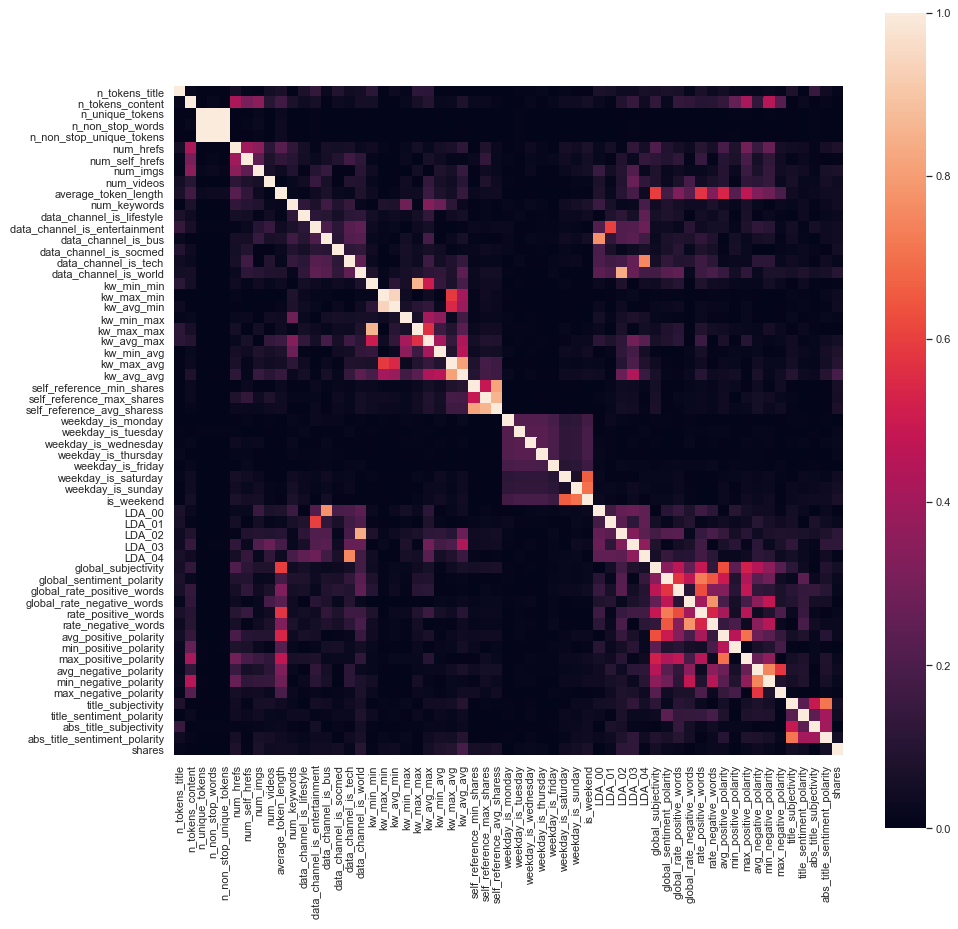

In [19]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, square=True);
plt.show()

In [20]:
corr_matrix['shares'].sort_values(ascending=False)

shares                            1.000000
kw_avg_avg                        0.184027
LDA_03                            0.122997
LDA_02                            0.117410
data_channel_is_world             0.103841
kw_max_avg                        0.096294
kw_min_avg                        0.081258
num_hrefs                         0.076651
num_imgs                          0.073403
self_reference_avg_sharess        0.067889
is_weekend                        0.067792
self_reference_min_shares         0.060230
self_reference_max_shares         0.055830
kw_avg_max                        0.052563
global_subjectivity               0.052508
abs_title_sentiment_polarity      0.052128
weekday_is_sunday                 0.049506
title_subjectivity                0.048917
data_channel_is_socmed            0.047302
average_token_length              0.046229
data_channel_is_bus               0.044540
num_keywords                      0.044302
 data_channel_is_entertainment    0.043201
weekday_is_

# Prepare Data

In [33]:
X = new_df.drop('shares', axis=1)
y = new_df['shares']

In [22]:
label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(y>=1400))

In [34]:
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.000000,0.582024,...,0.378636,0.100000,0.700000,0.650000,0.400000,0.800000,0.500000,0.406250,0.000000,0.187500
1,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.000000,0.611043,...,0.286915,0.033333,0.700000,0.881250,0.875000,0.900000,0.000000,0.500000,1.000000,0.000000
2,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.000000,0.546334,...,0.495833,0.100000,1.000000,0.533333,0.200000,0.866667,0.000000,0.500000,1.000000,0.000000
3,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.000000,0.547768,...,0.385965,0.136364,0.800000,0.630303,0.400000,0.833333,0.000000,0.500000,1.000000,0.000000
4,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.000000,0.582331,...,0.411127,0.033333,1.000000,0.779808,0.500000,0.950000,0.454545,0.568182,0.090909,0.136364
5,0.380952,0.043663,0.000799,0.00096,0.001074,0.006579,0.017241,0.000000,0.000000,0.542118,...,0.350610,0.136364,0.600000,0.805000,0.600000,0.900000,0.642857,0.607143,0.285714,0.214286
6,0.285714,0.113288,0.000597,0.00096,0.000846,0.069079,0.172414,0.156250,0.000000,0.578766,...,0.402039,0.100000,1.000000,0.775521,0.500000,0.950000,0.000000,0.500000,1.000000,0.000000
7,0.476190,0.116710,0.000619,0.00096,0.000880,0.065789,0.172414,0.156250,0.000000,0.574243,...,0.427720,0.100000,1.000000,0.757222,0.500000,0.950000,1.000000,0.750000,1.000000,0.500000
8,0.428571,0.011447,0.000956,0.00096,0.001287,0.006579,0.000000,0.000000,0.000000,0.603824,...,0.566667,0.400000,0.800000,0.875000,0.875000,0.875000,0.125000,0.500000,0.750000,0.000000
9,0.380952,0.027260,0.000908,0.00096,0.001226,0.013158,0.008621,0.007812,0.010989,0.633077,...,0.298413,0.100000,0.500000,0.761905,0.500000,0.900000,0.000000,0.500000,1.000000,0.000000


In [35]:
y

0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name: shares, Length: 39130, dtype: int64

# Split Training and Testing Data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Use Mdoel 1 : Linear Regression

In [37]:
some_X_data = X_train.iloc[:500]
some_y_data = y_train.iloc[:500]

In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print (lm.intercept_)
print (lm.coef_)

-1846364265203869.2
[ 9.15129639e+01  1.34544175e+03  1.77409807e+05 -1.07396226e+06
 -3.30890356e+04  3.55863305e+03 -2.03064779e+03  9.71124374e+02
  1.30534564e+03 -1.54122704e+03  1.42885634e+02 -3.45404312e+02
 -5.79030145e+02 -6.30043392e+02  1.46380135e+02  1.00555302e+02
 -1.13368970e+02  5.15774750e+02  1.22922680e+04 -1.33179056e+04
 -2.38688337e+02 -4.00598718e+01 -8.74159707e+02 -6.45231725e+02
 -3.25984814e+04  4.07058879e+04 -6.53787965e+02 -1.42705133e+03
  6.72642078e+03  1.84635551e+15  1.84635551e+15  1.84635551e+15
  1.84635551e+15  1.84635551e+15  4.99011189e+14  4.99011189e+14
  1.34734433e+15  8.11172323e+09  8.10255715e+09  8.05050937e+09
  8.10769197e+09  8.11344149e+09  1.14262844e+03  2.46839333e+02
 -4.62579483e+02  1.84501082e+02  8.82059895e+02  9.83096947e+02
 -5.36563216e+02 -3.61489567e+02  7.51360180e+01 -9.92232188e+02
  2.68791995e+02  1.80981409e+02  2.46506497e+02  4.34120370e+02
  1.86135511e+02  2.07733869e+02]


In [39]:
 lm.score(X_test,y_test)

-563647548.1950269

In [40]:
y_pred=lm.predict(X_test)

# Linear Regression - RMSE

In [41]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

80773105.96200977

In [42]:
df_someXdata = pd.DataFrame(lm.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,1100,1708.75
1,740,1527.50
2,938,1395.75
3,771,2523.75
4,810,3224.75


In [43]:
print("Accuracy on training set: {:.3f}".format(lm.score(X_train, y_train)))

Accuracy on training set: 0.072


In [46]:
print("Accuracy on test set: {:.3f}".format(lm.score(X_test, y_test)))

Accuracy on test set: -563647548.195


# Use Mdoel 2 : Decision Tree

In [47]:
dtree = DecisionTreeRegressor(max_depth=3,random_state=0)
dmodel=dtree.fit(X_train, y_train)

In [48]:
y_pred=dmodel.predict(X_test)

In [49]:
some_X_data = X_train.iloc[:5]
some_y_data = y_train.iloc[:5]
print("Predicted shares:", dtree.predict(some_X_data))
print("Actual shares:", list(some_y_data))

Predicted shares: [1700.67917695 2196.20351157 2210.84737733 2893.40827338 2210.84737733]
Actual shares: [1100, 740, 938, 771, 810]


# Decision Tree - RMSE and MAE 

In [50]:
tree_mse=mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3316.6858729926157

In [51]:
tree_mae = mean_absolute_error(y_test, y_pred)
print(tree_mae)

1942.7334235999729


In [52]:
print(dmodel.score(X_test,y_test))

0.0496518389142383


# Use Mdoel 3 : Random Forest

In [53]:
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
rf_regressor.fit(X_train, y_train)  
y_pred = rf_regressor.predict(X_test)  

In [54]:
some_X_data = X_train.iloc[:500]
some_y_data = y_train.iloc[:500]
df_someXdata = pd.DataFrame(rf_regressor.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,1100,1170.15
1,740,1050.90
2,938,1142.25
3,771,2085.35
4,810,3062.00


In [55]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 2053.9305903398927
Mean Squared Error: 11604796.281184513
Root Mean Squared Error: 3406.5813187394356


# Finding the optimal number of hyperparameters through Grid Search 

In [56]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [57]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3750.1683074589455 {'max_features': 2, 'n_estimators': 3}
3370.127775741432 {'max_features': 2, 'n_estimators': 10}
3759.29647561302 {'max_features': 3, 'n_estimators': 3}
3378.5308277893446 {'max_features': 3, 'n_estimators': 10}
3755.3949617846756 {'max_features': 4, 'n_estimators': 3}
3375.67706910303 {'max_features': 4, 'n_estimators': 10}
3739.0057488872235 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3371.7524459620495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3757.266844627561 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3381.0248885501333 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
3755.0445314271715 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
3374.045035690882 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [58]:
print(grid_search.best_params_)

{'max_features': 2, 'n_estimators': 10}


# Evaluating the Final Model with the Test Set

In [59]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3437.203323823328

# Testing the model with actual data

In [60]:
some_X_data = X_test.iloc[:] 
some_y_data = y_test.iloc[:] 

Predicted_shares = list(final_model.predict(some_X_data)) 

Actual_shares = list(some_y_data)

final_data = [Predicted_shares, Actual_shares]

In [61]:
sorted(zip(Predicted_shares, Actual_shares), reverse=True);

In [62]:
df_shares = pd.DataFrame(Predicted_shares, Actual_shares)   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP.head()

,Actual shares,Predicted shares
0,2300,1845.1
1,1900,2880.0
2,14100,2006.8
3,1600,2479.5
4,956,3635.0
